In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf


In [2]:
df = pd.read_csv('food_claims_2212.csv', index_col='claim_id')
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
claim_id,,,,,,,
1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [3]:
df.shape

(2000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_to_close         2000 non-null   int64  
 1   claim_amount          2000 non-null   object 
 2   amount_paid           1964 non-null   float64
 3   location              2000 non-null   object 
 4   individuals_on_claim  2000 non-null   int64  
 5   linked_cases          1974 non-null   object 
 6   cause                 2000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 125.0+ KB


In [5]:
df.isnull().sum()

time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [6]:
df.describe()

,time_to_close,amount_paid,individuals_on_claim
count,2000.00000,1964.000000,2000.000000
mean,185.56800,21541.975183,8.049500
std,49.16339,12530.156509,4.087347
min,76.00000,1516.720000,1.000000
25%,158.00000,10995.950000,4.000000
50%,179.00000,20105.700000,8.000000
75%,204.00000,30709.350000,12.000000
max,518.00000,52498.750000,15.000000


In [7]:
# Decoding the days in time_to_close column to years
# and then storing it in a list years

months = []

def append_value(days):
    months.append(days)

for day in df['time_to_close']:
    if day <= 90:
        append_value('Within a quarter')
    elif day <= 180:
        append_value('Within 2 quarters')
    elif day <= 270:
        append_value('Within 3 quarters')
    elif day <= 365:
        append_value('Within a year')
    else:    
        append_value('Over a year')
        


In [8]:
df['discrete_time_to_close'] = months

In [9]:
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,discrete_time_to_close
claim_id,,,,,,,,
1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown,Within a year
2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown,Within 3 quarters
3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat,Within 3 quarters
4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat,Within 3 quarters
5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable,Within 2 quarters


In [10]:
#Replace missing values with the overall median amount paid.
df['amount_paid'] = df['amount_paid'].fillna(df['amount_paid'].median())

In [11]:
#Replace missing values with FALSE.
df['linked_cases'] = df['linked_cases'].fillna(False)

In [12]:
#change claim_amount type to float
df['claim_amount'] = df['claim_amount'].str.extract('(\d+\.\d+)').astype('float')
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,discrete_time_to_close
claim_id,,,,,,,,
1,317,74474.55,51231.37,RECIFE,15,False,unknown,Within a year
2,195,52137.83,42111.30,FORTALEZA,12,True,unknown,Within 3 quarters
3,183,24447.20,23986.30,SAO LUIS,10,True,meat,Within 3 quarters
4,186,29006.28,27942.72,FORTALEZA,11,False,meat,Within 3 quarters
5,138,19520.60,16251.06,RECIFE,11,False,vegetable,Within 2 quarters


In [13]:
#Replace missing values with the overall median claim amount.
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].median())

In [14]:
df.head()

,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,discrete_time_to_close
claim_id,,,,,,,,
1,317,74474.55,51231.37,RECIFE,15,False,unknown,Within a year
2,195,52137.83,42111.30,FORTALEZA,12,True,unknown,Within 3 quarters
3,183,24447.20,23986.30,SAO LUIS,10,True,meat,Within 3 quarters
4,186,29006.28,27942.72,FORTALEZA,11,False,meat,Within 3 quarters
5,138,19520.60,16251.06,RECIFE,11,False,vegetable,Within 2 quarters


In [15]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [16]:
#convert cause values to lowercase, remove spaces, replace vegetable with vegetablies
df['cause'] = df['cause'].str.lower()
df['cause'] = df['cause'].str.strip()
df['cause'] = df['cause'].replace('vegetable', 'vegetables')

In [17]:
df.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,185.56800,27163.213490,21516.122230,8.049500
std,49.16339,16123.779079,12418.285043,4.087347
min,76.00000,1637.940000,1516.720000,1.000000
25%,158.00000,13826.665000,11106.652500,4.000000
50%,179.00000,24906.030000,20105.700000,8.000000
75%,204.00000,38494.362500,30472.895000,12.000000
max,518.00000,76106.800000,52498.750000,15.000000


In [18]:
cause_by_location = df.groupby('location')['cause'].count().reset_index()

In [30]:
cause_by_location

,location,cause
0,FORTALEZA,311
1,NATAL,287
2,RECIFE,885
3,SAO LUIS,517


[]

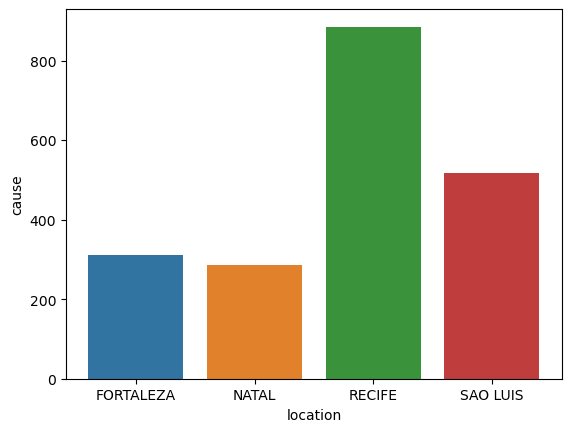

In [19]:
sns.barplot(data = cause_by_location, x='location', y='cause')
plt.plot()

In [21]:
cause_cat_by_location = df.groupby(['location','cause'])['amount_paid'].count().reset_index()

[]

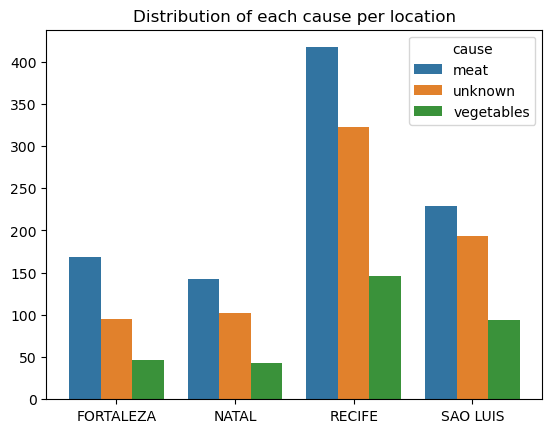

In [23]:
sns.barplot(data = cause_cat_by_location, x='location', y='amount_paid', hue='cause')
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of each cause per location')
plt.plot()

[]

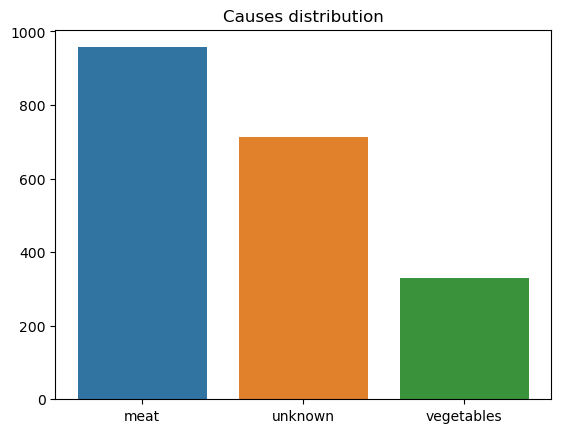

In [25]:
cause_distribution = df.groupby('cause')['amount_paid'].count().reset_index()
sns.barplot(data = cause_distribution, x='cause', y='amount_paid')
plt.xlabel('')
plt.ylabel('')
plt.title('Causes distribution')
plt.plot()

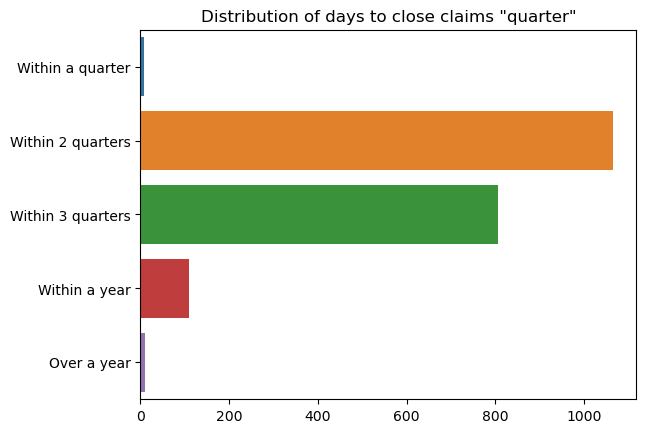

In [26]:
days_to_close = df.groupby('discrete_time_to_close')['location'].count().reset_index()
order = ["Within a quarter", "Within 2 quarters", "Within 3 quarters", "Within a year", "Over a year"]
sns.barplot(data=days_to_close, y='discrete_time_to_close', x='location', order = order)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of days to close claims "quarter"')
plt.show()

In [38]:
timetoclose_per_location = df.groupby('location')['discrete_time_to_close'].count().reset_index()

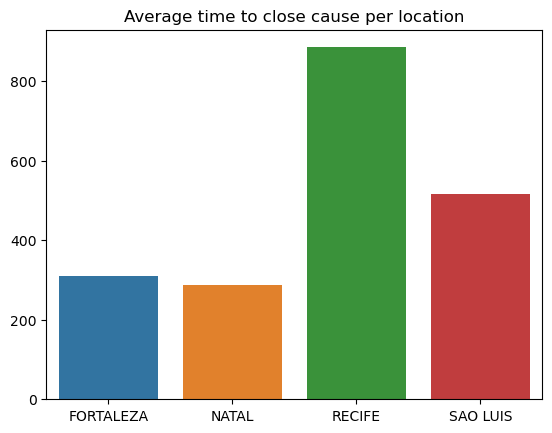

In [39]:
sns.barplot(data=timetoclose_per_location, x='location', y='discrete_time_to_close')
plt.xlabel('')
plt.ylabel('')
plt.title('Average time to close cause per location')
plt.show()

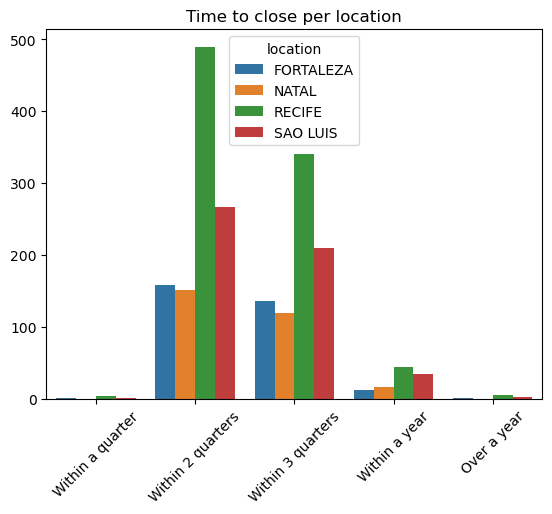

In [29]:
cause_close_time = df.groupby(['location','discrete_time_to_close'])['cause'].count().reset_index()
sns.barplot(data = cause_close_time, x='discrete_time_to_close', y='cause', hue='location', order = order)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Time to close per location')
plt.show()

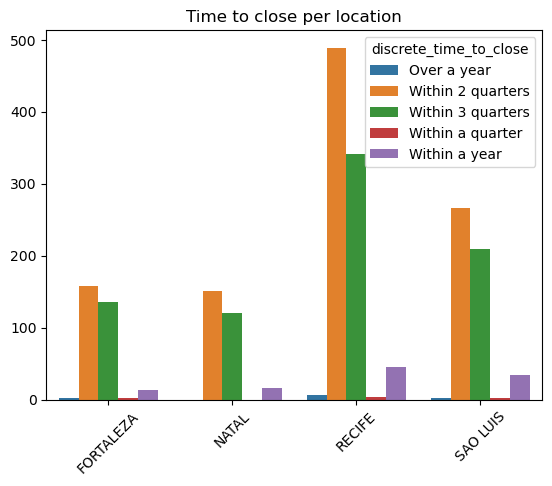

In [34]:
cause_close_time = df.groupby(['location','discrete_time_to_close'])['cause'].count().reset_index()
sns.barplot(data = cause_close_time, x='location', y='cause', hue='discrete_time_to_close')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Time to close per location')
plt.show()

In [33]:
cause_close_time

,location,discrete_time_to_close,cause
0,FORTALEZA,Over a year,2
1,FORTALEZA,Within 2 quarters,158
2,FORTALEZA,Within 3 quarters,136
3,FORTALEZA,Within a quarter,2
4,FORTALEZA,Within a year,13
5,NATAL,Within 2 quarters,151
6,NATAL,Within 3 quarters,120
7,NATAL,Within a year,16
8,RECIFE,Over a year,6
9,RECIFE,Within 2 quarters,489


In [31]:
df['location'].value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64